<a href="https://colab.research.google.com/github/RolandVizz/challenge-alura-store-latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis

#### Importación de datos



In [84]:
!pip install folium
import folium

In [85]:
import pandas as pd

pd.set_option('display.float_format', '{:,.2f}'.format)

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tiendas = {
    'Tienda 1' : tienda1,
    'Tienda 2' : tienda2,
    'Tienda 3' : tienda3,
    'Tienda 4' : tienda4
}

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300.00","6,900.00",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.61,-74.08
1,Mesa de comedor,Muebles,"192,300.00","8,400.00",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25,-75.56
2,Juego de mesa,Juguetes,"209,600.00","15,900.00",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.40,-75.51
3,Microondas,Electrodomésticos,"757,500.00","41,000.00",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.44,-76.52
4,Silla de oficina,Muebles,"335,200.00","20,200.00",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25,-75.56


In [86]:
tienda4.shape

(2358, 12)

####1. Análisis de facturación



In [87]:
df_resumen_ventas = pd.DataFrame({'Facturacion_total' : [df['Precio'].sum() for df in tiendas.values()]}, index=tiendas.keys())

In [88]:
df_resumen_ventas

,Facturacion_total
Tienda 1,"1,150,880,400.00"
Tienda 2,"1,116,343,500.00"
Tienda 3,"1,098,019,600.00"
Tienda 4,"1,038,375,700.00"


#### 2. Ventas por categoría

In [89]:
top_ventas_tienda1 = pd.DataFrame(tienda1['Categoría del Producto'].value_counts())
top_ventas_tienda1.rename(columns={'count' : 'Ventas'},inplace=True)
top_ventas_tienda1

,Ventas
Categoría del Producto,
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171


In [90]:
top_ventas_tienda2 = pd.DataFrame(tienda2['Categoría del Producto'].value_counts())
top_ventas_tienda2.rename(columns={'count' : 'Ventas'},inplace=True)
top_ventas_tienda2

,Ventas
Categoría del Producto,
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181


In [91]:
top_ventas_tienda3 = pd.DataFrame(tienda3['Categoría del Producto'].value_counts())
top_ventas_tienda3.rename(columns={'count' : 'Ventas'},inplace=True)
top_ventas_tienda3

,Ventas
Categoría del Producto,
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Instrumentos musicales,177
Artículos para el hogar,177


In [92]:
top_ventas_tienda4 = pd.DataFrame(tienda4['Categoría del Producto'].value_counts())
top_ventas_tienda4.rename(columns={'count' : 'Ventas'},inplace=True)
top_ventas_tienda4

,Ventas
Categoría del Producto,
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


In [93]:
ventas_categorias = {nombre : tienda['Categoría del Producto'].value_counts() for nombre,tienda in tiendas.items()}
df_ventas_categorias_x_tienda = pd.concat(ventas_categorias,axis=1)
df_ventas_categorias_x_tienda

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201


#### 3. Calificación promedio de la tienda


In [94]:
calificacion_promedio_x_tienda = pd.DataFrame({'Promedio_calificacion' : [tienda['Calificación'].mean() for tienda in tiendas.values()]},index=tiendas.keys())

In [95]:
calificacion_promedio_x_tienda

,Promedio_calificacion
Tienda 1,3.98
Tienda 2,4.04
Tienda 3,4.05
Tienda 4,4.00


#### 4. Productos más y menos vendidos

In [96]:
top_productos = pd.DataFrame({'Mas_vendido' : [tienda['Producto'].value_counts().idxmax() for tienda in tiendas.values()]},index=tiendas.keys())
top_productos['Menos_vendido'] = [tienda['Producto'].value_counts().idxmin() for tienda in tiendas.values()]

In [97]:
top_productos

,Mas_vendido,Menos_vendido
Tienda 1,Microondas,Auriculares con micrófono
Tienda 2,Iniciando en programación,Juego de mesa
Tienda 3,Kit de bancas,Bloques de construcción
Tienda 4,Cama box,Guitarra eléctrica


#### 5. Envío promedio por tienda

In [98]:
promedio_costo_envio = pd.DataFrame({'Promedio_envio' : [tienda['Costo de envío'].mean() for tienda in tiendas.values()]}, index=tiendas.keys())

In [99]:
promedio_costo_envio

,Promedio_envio
Tienda 1,"26,018.61"
Tienda 2,"25,216.24"
Tienda 3,"24,805.68"
Tienda 4,"23,459.46"


In [100]:
costo_envio_total = pd.DataFrame({'Total_envio' : [tienda['Costo de envío'].sum() for tienda in tiendas.values()]},index=tiendas.keys())

In [101]:
costo_envio_total

,Total_envio
Tienda 1,"61,377,900.00"
Tienda 2,"59,485,100.00"
Tienda 3,"58,516,600.00"
Tienda 4,"55,317,400.00"


# **Informe**

Se realizó el análisis de cuatro tiendas sobre distintos indicadores. El motivo de esto es que se necesita evaluar, cuál de las cuatro tiendas es la que puede ser vendida, esto a solicitud de nuestro cliente, el Sr. Juan.

#### Facturación total por tienda

Comencemos por la facturación total de cada una de las tiendas. La siguiente gráfica muestra el total de ganancias obtenidas entre las cuatro tiendas, donde podemos visualizar que la tienda uno representa el 26.13% de las ganancias totales, mientras que la tienda cuatro (siendo la más baja) el 23.58%. Se puede visualizar que hay una diferencia aproximada del 3% entre ambas tiendas.

array([<Axes: ylabel='Facturacion_total'>], dtype=object)

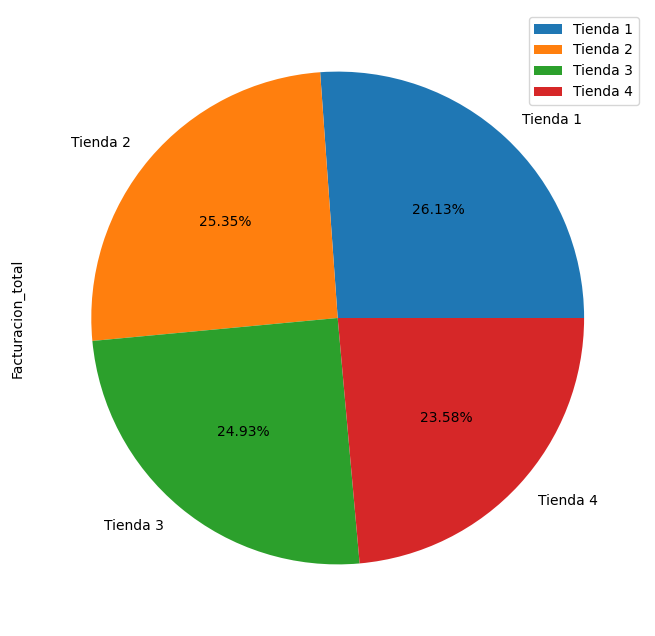

In [102]:
df_resumen_ventas.plot(kind='pie',figsize=(12,8),subplots=True,autopct='%1.2f%%')

#### Comparación de ventas por categoría en cada tienda.

Aquí podemos comparar el total de ventas de cada categoría entre cada una de las tiendas. Al interpretarla, podemos ver que las categorías más vendidas son: muebles, electrónicos y juguetes.  <br>  
Teniendo esto en cuenta, podémos ver que la tienda número dos es la que tiene un bajo rendimiento en la venta de estas tres categorías en el top, pero se recupera a partir de las siguientes cinco categorías restantes.  <br>  
Me gustaría destacar que la tienda cuatro, es la que menos ingresos ha tenido, pero se encuentra en el tercer lugar de ventas por categoría. Esto podría explicarse a que la tienda puede estar vendiendo productos de menor precio, podría entenderse como cojines en muebles, accesorios para celular en electrónicos y juguetes pequeños en juguetería.

<Axes: xlabel='Categoría del Producto'>

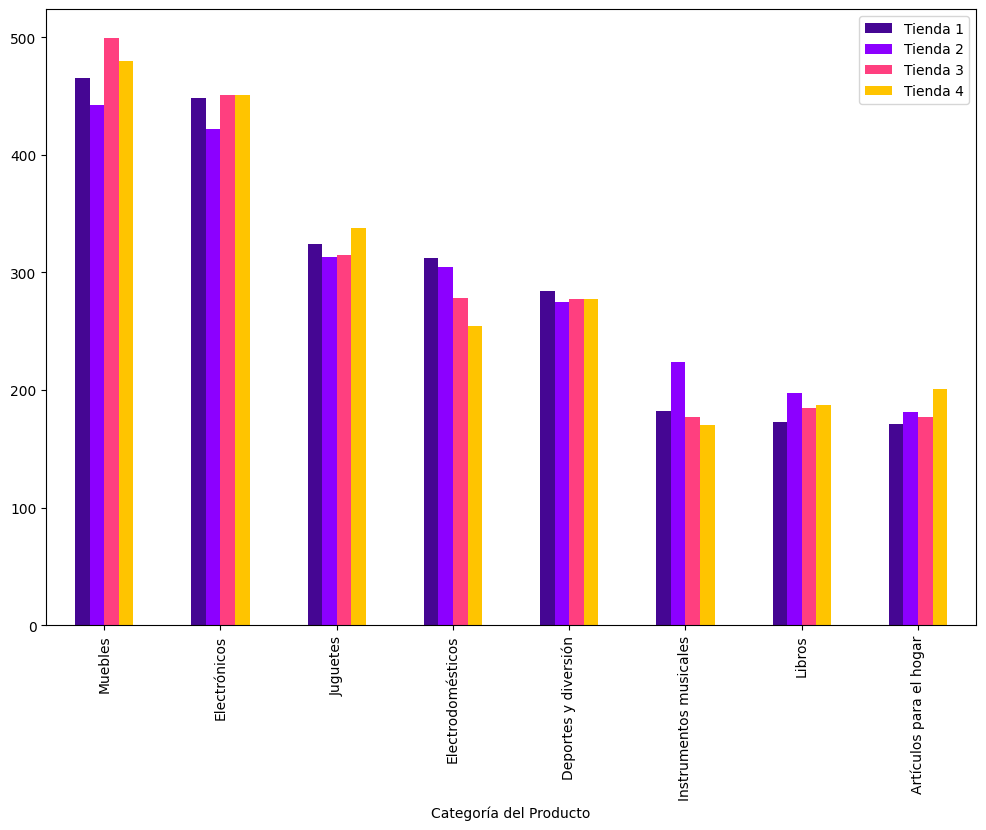

In [103]:
df_ventas_categorias_x_tienda.plot(kind='bar',figsize=(12,8),color=['#450693','#8C00FF','#FF3F7F','#FFC400'])

Esto se demuestra con la siguiente tabla donde se muestra cuales son los productos más y menos vendidos en cada una de las tiendas, donde se puede visualizar que la tienda cuatro vende adicionales de productos más grandes o productos más sencillos.

In [104]:
top_productos

,Mas_vendido,Menos_vendido
Tienda 1,Microondas,Auriculares con micrófono
Tienda 2,Iniciando en programación,Juego de mesa
Tienda 3,Kit de bancas,Bloques de construcción
Tienda 4,Cama box,Guitarra eléctrica


#### Evaluaciones de los clientes

Revisando el promedio de calificaciones que los clientes hacen en cada una de las tiendas, podémos confirmar que la tienda uno es la que menor calificación tiene. Esto no define a la tienda uno como mala, ya que validando los criterios anteriores, es la que mayores ingresos genera entre las otras tres tiendas. Se recomienda validar alguna mejora en la atención al cliente.  <br>  
La tienda con mayor calificación es la tres con un promedio de 4.05. Cabe destacar que la desviación entre la tienda con mayor y menor calificación es mínima.

<Axes: >

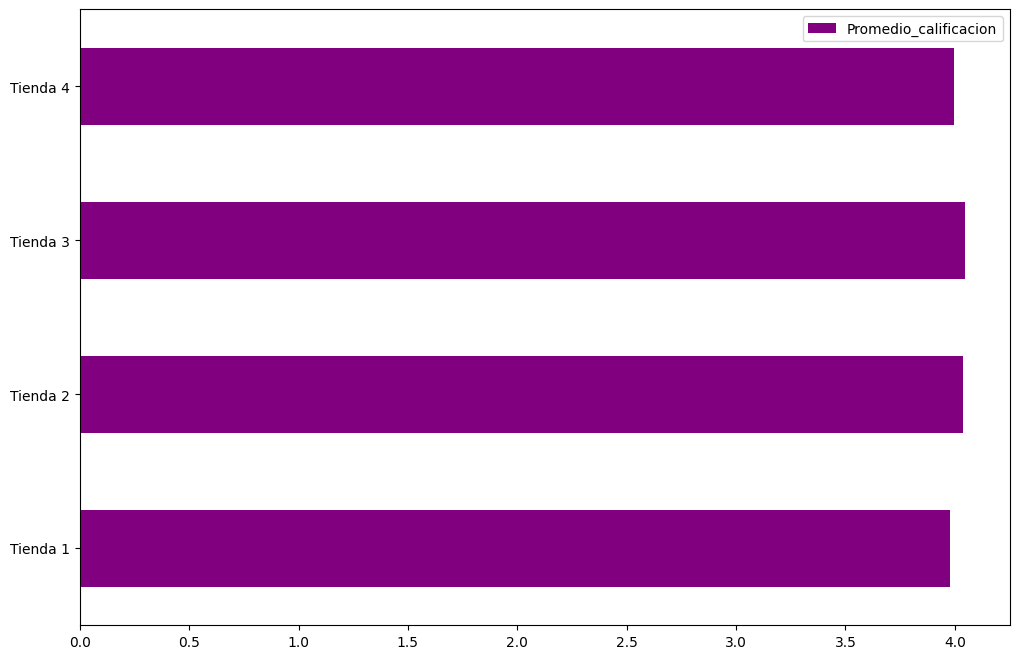

In [105]:
calificacion_promedio_x_tienda.plot(kind='barh',figsize=(12,8),color='Purple')

#### Promedio sobre el costo de envío

En esta gráfica podemos ver el costo promedio de envío por cada tienda, destacando a la tienda uno como la que tiene un costo mayor. Esto es relativo, ya que sabemos que la tienda uno, a pesar de generar gastos de envío altos, es la que mayores ingresos de entre las 4 genera. La tienda cuatro es la que menor costos de envío tiene.  

Esto puede justificarse a los productos que vende tomando en cuenta el punto dos donde se muestran las categorías más vendidas.

<Axes: >

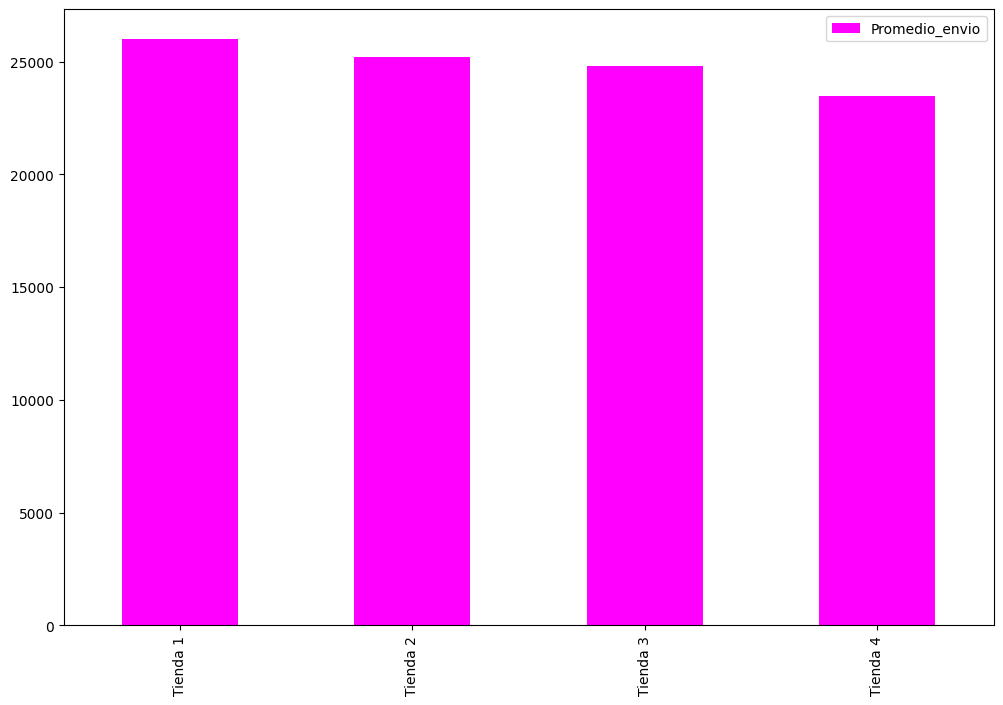

In [106]:
promedio_costo_envio.plot(kind='bar',figsize=(12,8),color='Magenta')

#### Conclusión

Basandonos en los criterios presentados al momento de realizar al análisis correspondiente, puedo confirmar que la tienda cuatro es la mejor candidata para ser vendida. Reiterando y como resumen, es la tienda que menos a facturado y la que genera ventas sencillas, siendo que estas pueden ser aprovechadas como "ventas upselling" adicionando ventas más grandes. Como nota, la diferencia de dinero entre la uno y la cuatro es de \$112,504,700.00 y entre la tres y la cuatro de \$59,643,900.00

Con esto se recomienda vender la tienda cuatro y tomar medidas preventivas para las otras tres restantes enfocandose en la atención a los clientes y el reforzamiento de adquisición de productos sobre las categorías de muebles, electrónica y juguetes.

#### Distribución de ventas en tienda 1

In [107]:
mapa1 = folium.Map(location=[tienda1['lat'].mean(),tienda1['lon'].mean()],zoom_start=5)

for _, registro in tienda1.iterrows():
  folium.CircleMarker(location=[registro['lat'],registro['lon']],radius=2,color='blue',fill=True,fill_color='blue',fill_opacity=0.8).add_to(mapa1)

In [108]:
mapa1